In [3]:
import numpy as np
import os
import cv2
import tensorflow 
import keras  
import glob 
import keras  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from skimage import io 
import random 
from sklearn.metrics import classification_report, confusion_matrix  

import matplotlib.pyplot as plt  
%matplotlib inline
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
DATADIR = '/content/gdrive/MyDrive/archive/lego/'

# DATADIR = 'drive/My Drive/archive/lego'
CATEGORIES =["2357 Brick corner 1x2x2" , "3003 Brick 2x2" , "3004 Brick 1x2" , "3005 Brick 1x1" , "3022 Plate 2x2" , "3023 Plate 1x2" , "3024 Plate 1x1" , "3040 Roof Tile 1x2x45deg" , "3069 Flat Tile 1x2" , "3673 Peg 2M" , "3713 Bush for Cross Axle" , "3794 Plate 1X2 with 1 Knob" , "6632 Technic Lever 3M" , "11214 Bush 3M friction with Cross axle" , "18651 Cross Axle 2M with Snap friction" , "32123 half Bush"]

flat_data_arr=[] #input array
target_arr=[] #output array

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)   # create path to each class
    for img in os.listdir(path):    # iterate over each image per class
      try:
        img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        IMG_SIZE = 50
        img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))   # resize to normalize data size
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(CATEGORIES.index(category))   # get the classification  (0 or a 1). 0=dog 1=cat
      except Exception as e:  # in the interest in keeping the output clean...
                pass
    print(f'loaded category:{category} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data(features)  independent values
y=df.iloc[:,-1] #output data(labels)  dependent values

loaded category:2357 Brick corner 1x2x2 successfully
loaded category:3003 Brick 2x2 successfully
loaded category:3004 Brick 1x2 successfully
loaded category:3005 Brick 1x1 successfully
loaded category:3022 Plate 2x2 successfully
loaded category:3023 Plate 1x2 successfully
loaded category:3024 Plate 1x1 successfully
loaded category:3040 Roof Tile 1x2x45deg successfully
loaded category:3069 Flat Tile 1x2 successfully
loaded category:3673 Peg 2M successfully
loaded category:3713 Bush for Cross Axle successfully
loaded category:3794 Plate 1X2 with 1 Knob successfully
loaded category:6632 Technic Lever 3M successfully
loaded category:11214 Bush 3M friction with Cross axle successfully
loaded category:18651 Cross Axle 2M with Snap friction successfully
loaded category:32123 half Bush successfully


In [45]:
from sklearn import linear_model
model = linear_model.LogisticRegression(max_iter=78)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)  #feature , labels 
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [46]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=78)

In [47]:
from sklearn.metrics import accuracy_score

y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 7 5 ... 2 7 1]
The actual data is:
[ 0  7 11 ...  8  7  1]
The model is 84.48275862068965% accurate


In [48]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.98      0.84      0.91        76
           1       1.00      1.00      1.00        80
           2       0.88      0.95      0.92        80
           3       1.00      1.00      1.00        80
           4       0.86      0.85      0.86        80
           5       0.45      0.42      0.44        80
           6       0.93      0.96      0.94        80
           7       0.91      0.97      0.94        80
           8       0.74      0.70      0.72        80
           9       0.84      0.95      0.89        80
          10       1.00      1.00      1.00        80
          11       0.50      0.51      0.51        80
          12       0.99      0.88      0.93        80
          13       0.79      0.72      0.76        80
          14       0.67      0.78      0.72        80
          15       1.00      0.97      0.99        80

    accuracy                           0.84      1276
   macro avg       0.85   

Text(69.0, 0.5, 'Truth or Actual Value')

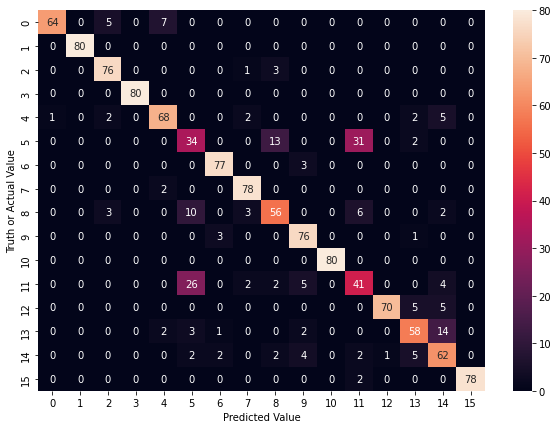

In [50]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred);
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')